In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
plt.style.use(['science','nature','notebook'])

In [105]:

joined_files = os.path.join(r"C:\Users\KuChris\Desktop\plot\1572nmfft\raw", "*.fft")

# A list of all joined files is returned
joined_list = glob.glob(joined_files)

# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True, axis=1)
print(df)

            0        1        2        3        4        5        6        7   \
0      2.73398  2.81740  2.82622  2.79809  2.77334  2.83029  2.82840  2.71464   
1      2.68585  2.72235  2.71200  2.73884  2.67324  2.70130  2.71053  2.68609   
2      2.72166  2.76004  2.74981  2.77334  2.71657  2.74011  2.76553  2.69889   
3      2.78135  2.83752  2.84823  2.82844  2.81603  2.84676  2.88080  2.72980   
4      2.79193  2.84355  2.88519  2.82029  2.84913  2.88431  2.91262  2.74173   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20395  4.59708  4.46408  4.55155  4.55384  4.55870  4.58688  4.62258  4.49479   
20396  4.57218  4.47656  4.53506  4.51673  4.54203  4.56502  4.62735  4.46366   
20397  4.53993  4.49182  4.50137  4.49610  4.52797  4.54324  4.61645  4.45094   
20398  4.49648  4.48448  4.45641  4.47887  4.51366  4.52107  4.57984  4.45444   
20399  4.45983  4.46604  4.43299  4.46817  4.51171  4.50468  4.53273  4.48714   

            8        9   ..

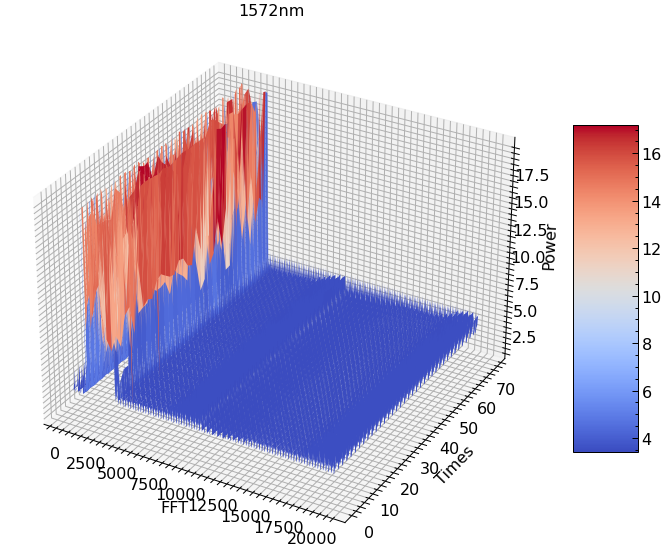

In [106]:
#%matplotlib qt5
#%matplotlib inline
x = df.columns.astype(float)
y = df.index
X,Y = np.meshgrid(x,y)
Z = df.values
Z[Z>20]= np.nan

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
plot1 = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
fig.colorbar(plot1, shrink=0.5, aspect=5)
ax.set_ylabel('Times')
ax.set_xlabel('FFT')
ax.set_zlabel('Power')
ax.set_title('1572nm')
#ax.view_init(0, 269)
plt.show()
#plt.savefig('1572nm3D.png')

In [107]:
mean = df.mean(1)

In [108]:
np.max(mean)

19.97181

Text(0, 0.5, 'Power')

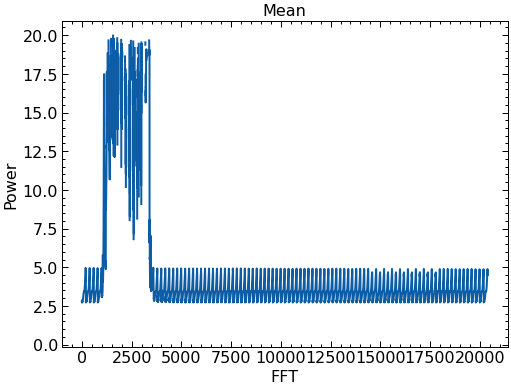

In [109]:
plt.figure()
plt.plot(mean.index, mean)
plt.title('Mean')
plt.xlabel('FFT')
plt.ylabel('Power')
#plt.savefig('mean.png')


Text(0, 0.5, 'Power')

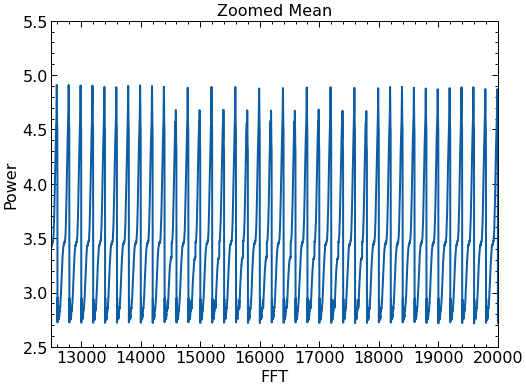

In [110]:
plt.figure()
plt.plot(mean.index, mean)
plt.xlim(12500,20000)
plt.ylim(2.5,5.5)
plt.title('Zoomed Mean')
plt.xlabel('FFT')
plt.ylabel('Power')
#plt.savefig('Zoomed Mean.png')

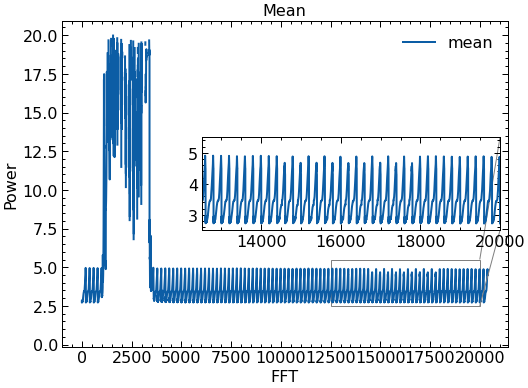

In [124]:
fig, ax = plt.subplots()

plt.plot(mean.index, mean,label='mean')
plt.title('Mean')
plt.xlabel('FFT')
plt.ylabel('Power')
plt.legend()

axins = zoomed_inset_axes(ax, 2, loc=7)  # zoom = 1.5
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# # Plot zoom window
axins.plot(mean.index,mean)
# plot in the inset axes
axins.set_xlim([12500,20000])
axins.set_ylim([2.5,5.5])
#plt.savefig('02.1_mean.png')

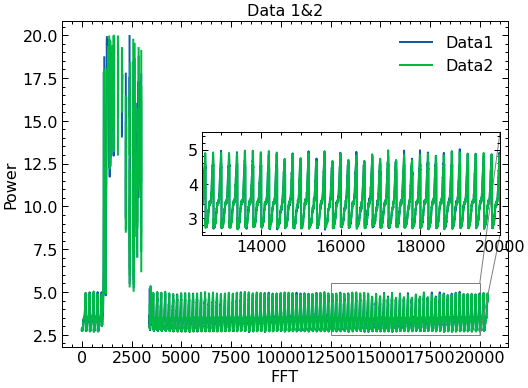

In [126]:
fig, ax = plt.subplots()

plt.plot(df.index,df[1], label='Data1')
plt.plot(df.index,df[2], label='Data2')
plt.title('Data 1&2')

plt.xlabel('FFT')
plt.ylabel('Power')
plt.legend()

axins = zoomed_inset_axes(ax, 2, loc=7)  # zoom = 1.5
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# # Plot zoom window
axins.plot(df.index,df[1], label='Data1')
axins.plot(df.index,df[2], label='Data2')
# plot in the inset axes
axins.set_xlim([12500,20000])
axins.set_ylim([2.5,5.5])
#plt.savefig('04.1_data1&2.png')

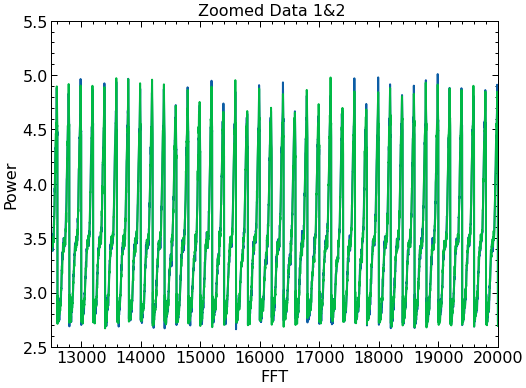

In [113]:
plt.figure()
plt.plot(df.index,df[1])
plt.plot(df.index,df[2])
plt.xlim(12500,20000)
plt.ylim(2.5,5.5)
plt.title('Zoomed Data 1&2 ')
plt.xlabel('FFT')
plt.ylabel('Power')
plt.savefig('zoomed data1&2.png')